In [3]:

import os
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image
from tqdm import tqdm
from ultralytics import YOLO  # Ensure you have `pip install ultralytics`
import random


# --- CONFIG ---
# DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {DEVICE}") 
BASE_DATA_ROOT = "../soccernet_data/tracking"
GT_FILENAME = "gt.txt"
IMAGE_FOLDER = "img1"
IMAGE_EXTS = ['.jpg', '.png']
NUM_VISUALS = 10
SCORE_THRESH = 0.5
IOU_THRESH = 0.5
SAMPLE_PER_SEQ = 30

Using device: cuda


Using device: cuda
Processing sequences...


Sequences:   0%|          | 0/106 [00:00<?, ?it/s]


0: 384x640 1 goalkeeper, 16 players, 1 referee, 31.9ms
Speed: 16.9ms preprocess, 31.9ms inference, 514.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 2 referees, 8.4ms
Speed: 1.4ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 2 referees, 8.1ms
Speed: 1.2ms preprocess, 8.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 10 players, 1 referee, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 1 referee, 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 8.2ms
Speed: 1.3ms preprocess, 8.2ms inference, 1.3ms postprocess 

Sequences:   1%|          | 1/106 [00:05<09:25,  5.38s/it]


0: 384x640 12 players, 1 referee, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 1 referee, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 1 referee, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 players, 1 referee, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 playe

Sequences:   2%|▏         | 2/106 [00:09<08:15,  4.77s/it]


0: 384x640 15 players, 1 referee, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 9.2ms
Speed: 3.8ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 7.6ms
Speed: 1.7ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 8.6ms
Speed: 1.4ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 8.0ms
Speed: 1.3ms preprocess, 8.0ms i

Sequences:   3%|▎         | 3/106 [00:13<07:29,  4.36s/it]


0: 384x640 16 players, 3 referees, 8.0ms
Speed: 1.6ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 26 players, 1 referee, 8.7ms
Speed: 3.4ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 6.8ms
Speed: 1.2ms preprocess, 6.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 2 referees, 7.7ms
Speed: 1.7ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 player

Sequences:   4%|▍         | 4/106 [00:18<07:30,  4.42s/it]


0: 384x640 1 goalkeeper, 18 players, 1 referee, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 2 referees, 8.2ms
Speed: 1.6ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 8.0ms
Speed: 1.7ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 3 referees, 8.1ms
Sp

Sequences:   5%|▍         | 5/106 [00:21<07:05,  4.22s/it]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 2 referees, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 8.0ms
Speed: 1.6ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 8.

Sequences:   6%|▌         | 6/106 [00:26<06:57,  4.18s/it]


0: 384x640 17 players, 2 referees, 8.3ms
Speed: 2.2ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 8.0ms
Speed: 1.7ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 8.4ms
Speed: 1.4ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 3 referees, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 3 referees, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 25 players, 1 referee

Sequences:   7%|▋         | 7/106 [00:30<06:57,  4.21s/it]


0: 384x640 24 players, 1 referee, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 2 referees, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 2 referees, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 7.5ms
Speed: 2.2ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 2 referee

Sequences:   8%|▊         | 8/106 [00:34<06:41,  4.10s/it]


0: 384x640 1 goalkeeper, 21 players, 2 referees, 9.8ms
Speed: 4.5ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3 referees, 9.2ms
Speed: 5.0ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 8.2ms
Speed: 1.9ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 8.1ms
Speed: 2.2ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.8ms
Speed: 1.7ms prep

Sequences:   8%|▊         | 9/106 [00:38<06:29,  4.01s/it]


0: 384x640 18 players, 1 referee, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3 referees, 9.7ms
Speed: 5.5ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 7.7ms
Speed: 1.7ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 8.

Sequences:   9%|▉         | 10/106 [00:41<06:17,  3.93s/it]


0: 384x640 1 goalkeeper, 18 players, 1 referee, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 2 referees, 8.0ms
Speed: 1.4ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 2 referees, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 7.6ms
Speed: 1.3ms pre

Sequences:  10%|█         | 11/106 [00:45<06:08,  3.88s/it]


0: 384x640 27 players, 1 referee, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 31 players, 1 referee, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 30 players, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 6.9ms
Speed: 1.5ms preprocess, 6.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 40 players, 1 referee, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.

Sequences:  11%|█▏        | 12/106 [00:49<06:01,  3.85s/it]


0: 384x640 18 players, 1 referee, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 1 referee, 7.1ms
Speed: 1.5ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 2 referees, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.

Sequences:  12%|█▏        | 13/106 [00:53<06:14,  4.03s/it]


0: 384x640 1 goalkeeper, 21 players, 1 referee, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.1ms
Speed: 1.2ms p

Sequences:  13%|█▎        | 14/106 [00:57<06:13,  4.06s/it]


0: 384x640 23 players, 1 referee, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 25 players, 1 referee, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 2 referees, 7

Sequences:  14%|█▍        | 15/106 [01:02<06:11,  4.08s/it]


0: 384x640 25 players, 9.1ms
Speed: 1.2ms preprocess, 9.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 25 players, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 30 players, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 7.2ms
Speed: 1.6ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.9ms postprocess per image at s

Sequences:  15%|█▌        | 16/106 [01:05<06:01,  4.02s/it]


0: 384x640 22 players, 4 referees, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 9.3ms
Speed: 2.7ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 4 referees, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 6 referees, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3 referees, 7.8ms
Speed: 1.6ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 1 referee, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 2 referees, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 play

Sequences:  16%|█▌        | 17/106 [01:10<06:21,  4.29s/it]


0: 384x640 1 goalkeeper, 18 players, 2 referees, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 2 referees, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 2 referees, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 23 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 2 referees, 7.0ms
Speed: 1.3ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 7.0ms
Speed: 1.3ms preprocess, 7.0ms inference, 0.9ms postprocess per image a

Sequences:  17%|█▋        | 18/106 [01:15<06:25,  4.38s/it]


0: 384x640 22 players, 1 referee, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 7.1ms
Speed: 1.5ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 1 referee, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 1 referee, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 24 players, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 7.6ms
Speed: 1

Sequences:  18%|█▊        | 19/106 [01:19<06:05,  4.21s/it]


0: 384x640 23 players, 1 referee, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3 referees, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 38 players, 1 referee, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 8 players, 2 referees, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 8.0ms
Speed: 1

Sequences:  19%|█▉        | 20/106 [01:23<05:52,  4.09s/it]


0: 384x640 9 players, 12.6ms
Speed: 1.6ms preprocess, 12.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.0ms
Speed: 1.6ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 1 referee, 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 1 referee, 6.9ms
Speed: 1.3ms preprocess, 6.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 1 referee, 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 26 players, 2 referees, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.0ms
Speed: 1.2ms pre

Sequences:  20%|█▉        | 21/106 [01:26<05:39,  4.00s/it]


0: 384x640 20 players, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 23 players, 1 referee, 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.2ms
Speed: 2.4ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 27 players, 1 referee, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 6.9ms
Speed: 1.3ms preprocess, 6.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 7.0ms
Speed: 1.5ms preprocess, 7.

Sequences:  21%|██        | 22/106 [01:30<05:37,  4.01s/it]


0: 384x640 14 players, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 10 players, 12.0ms
Speed: 1.3ms preprocess, 12.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 11 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms p

Sequences:  22%|██▏       | 23/106 [01:34<05:30,  3.98s/it]


0: 384x640 20 players, 1 referee, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 3 referees, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 1 referee, 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 2 referees, 7.0ms
Speed: 1.3ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 player

Sequences:  23%|██▎       | 24/106 [01:39<05:42,  4.18s/it]


0: 384x640 20 players, 1 referee, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 35 players, 1 referee, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 2 referees, 7.0ms
Speed: 1.2ms preproce

Sequences:  24%|██▎       | 25/106 [01:43<05:44,  4.25s/it]


0: 384x640 24 players, 10.2ms
Speed: 3.0ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 14.6ms
Speed: 1.3ms preprocess, 14.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 33 players, 1 referee, 8.4ms
Speed: 1.3ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 34 players, 1 referee, 8.1ms
Speed: 1.2ms preprocess, 8.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 32 players, 1 referee, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 1 referee, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 8.3ms
Speed: 2.4ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee,

Sequences:  25%|██▍       | 26/106 [01:47<05:36,  4.21s/it]


0: 384x640 13 players, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 1 referee, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.9ms post

Sequences:  25%|██▌       | 27/106 [01:52<05:35,  4.25s/it]


0: 384x640 15 players, 8.0ms
Speed: 1.5ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 9.5ms
Speed: 1.4ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 8.0ms
Speed: 1.4ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 8.0ms
Speed: 1.4ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 2 referees, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.1ms postpr

Sequences:  26%|██▋       | 28/106 [01:56<05:21,  4.13s/it]


0: 384x640 11 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 7.0ms
Speed: 1.6ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 7.0ms
Speed: 1.5ms preprocess, 7.0ms in

Sequences:  27%|██▋       | 29/106 [01:59<05:03,  3.94s/it]


0: 384x640 5 players, 8.0ms
Speed: 1.5ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 2 referees, 14.1ms
Speed: 1.5ms preprocess, 14.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 9 players, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 30 players, 2 referees, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 7.4ms
Speed: 1.4m

Sequences:  28%|██▊       | 30/106 [02:03<04:57,  3.91s/it]


0: 384x640 19 players, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 30 players, 2 referees, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 27 players, 2 referees, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 2 referees, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 7.2ms
Spee

Sequences:  29%|██▉       | 31/106 [02:07<04:53,  3.91s/it]


0: 384x640 19 players, 1 referee, 8.7ms
Speed: 1.5ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 8.4ms
Speed: 1.6ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 8.3ms
Speed: 1.4ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 8.1ms
Speed: 1.6ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 8.1ms
Speed: 1.3ms preprocess, 8.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 9.3ms
Speed: 1.5ms preprocess, 9.3ms in

Sequences:  30%|███       | 32/106 [02:11<04:56,  4.00s/it]


0: 384x640 28 players, 1 referee, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 8.5ms
Speed: 1.4ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 1 referee, 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 2 referees, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19

Sequences:  31%|███       | 33/106 [02:15<04:46,  3.93s/it]


0: 384x640 13 players, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 8.0ms
Speed: 1.6ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 3 referees, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 players, 1 referee, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players,

Sequences:  32%|███▏      | 34/106 [02:19<04:41,  3.90s/it]


0: 384x640 24 players, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 3 referees, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 2 referees, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 7.2ms
Speed: 1.6ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 2 referees, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms post

Sequences:  33%|███▎      | 35/106 [02:23<04:36,  3.90s/it]


0: 384x640 17 players, 1 referee, 8.1ms
Speed: 2.2ms preprocess, 8.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 7.3ms
Speed: 2.5ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 9.0ms
Speed: 2.5ms preprocess, 9.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 1 referee, 8.3ms
Speed: 1.6ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 7.9ms
Speed: 1.5ms prepro

Sequences:  34%|███▍      | 36/106 [02:27<04:40,  4.01s/it]


0: 384x640 24 players, 8.3ms
Speed: 1.6ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 7.8ms
Speed: 1.6ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.8ms
Speed: 1.6ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 8.0ms
Speed: 1.4ms preprocess, 8.0ms inference, 1.1ms postpro

Sequences:  35%|███▍      | 37/106 [02:31<04:37,  4.01s/it]


0: 384x640 18 players, 8.1ms
Speed: 1.4ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 7.9ms
Speed: 1.6ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 7.5ms
Speed: 2.6ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape

Sequences:  36%|███▌      | 38/106 [02:35<04:32,  4.01s/it]


0: 384x640 20 players, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 26 players, 8.1ms
Speed: 1.3ms preprocess, 8.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 27 players, 1 referee, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 8.5ms
Speed: 1.3ms preprocess, 8.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 23 players, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 28 players, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 25 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 8.3ms
Speed: 

Sequences:  37%|███▋      | 39/106 [02:39<04:30,  4.03s/it]


0: 384x640 16 players, 3 referees, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 5 players, 2 referees, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 8

Sequences:  38%|███▊      | 40/106 [02:43<04:22,  3.97s/it]


0: 384x640 10 players, 3 referees, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 34 players, 3 referees, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 8.0ms
Speed: 1.7ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 1 referee, 8.9ms
Speed: 1.3ms preprocess, 8.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 2 referees, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 2 referees, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 8.

Sequences:  39%|███▊      | 41/106 [02:47<04:20,  4.01s/it]


0: 384x640 1 goalkeeper, 23 players, 4 referees, 8.3ms
Speed: 1.3ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 2 referees, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 players, 1 referee, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 8.9ms
Speed: 1.5ms preprocess, 8.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 3 referees, 8.1ms
Speed: 1.3ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 8.6ms
Speed: 1.3ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384

Sequences:  40%|███▉      | 42/106 [02:51<04:20,  4.08s/it]


0: 384x640 23 players, 1 referee, 8.4ms
Speed: 1.4ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 8.2ms
Speed: 1.3ms preprocess, 8.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 8.3ms
Speed: 1.3ms preprocess, 8.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 1 referee, 8.1ms
Speed: 1.2ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 38 players, 8.1ms
Speed: 1.4ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 8.8ms
Speed: 2.8ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 8.7ms
Speed: 1.3ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 players, 1 referee, 7.4ms
Speed: 1.2ms preproces

Sequences:  41%|████      | 43/106 [02:55<04:14,  4.04s/it]


0: 384x640 11 players, 1 referee, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 7.8ms
Speed: 2.4ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 9 players, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 11 players, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference

Sequences:  42%|████▏     | 44/106 [02:59<04:15,  4.12s/it]


0: 384x640 1 goalkeeper, 18 players, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 referee, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 12 players, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 referee, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 8.3ms
Speed: 1.6ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 goalkeepers, 12 players, 7.8ms
Speed: 1.4ms pr

Sequences:  42%|████▏     | 45/106 [03:04<04:18,  4.24s/it]


0: 384x640 22 players, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 8.5ms
Speed: 2.4ms preprocess, 8.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.1ms
Speed: 1.5ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 2 referees, 8.3ms
Speed: 1.3ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 1 referee, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference

Sequences:  43%|████▎     | 46/106 [03:08<04:09,  4.16s/it]


0: 384x640 12 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 referee, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 8.3ms
Speed: 1.4ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.2m

Sequences:  44%|████▍     | 47/106 [03:12<04:00,  4.08s/it]


0: 384x640 18 players, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 2 referees, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.0ms postprocess per i

Sequences:  45%|████▌     | 48/106 [03:16<03:52,  4.01s/it]


0: 384x640 31 players, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 10 players, 1 referee, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 25 players, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 25 players, 1 referee, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 goalkeepers, 8 players, 10.7ms
Speed: 1.4ms preprocess, 10.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 7.9ms
Speed: 2.1ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 26

Sequences:  46%|████▌     | 49/106 [03:19<03:39,  3.85s/it]


0: 384x640 19 players, 8.2ms
Speed: 1.4ms preprocess, 8.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 11 players, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 8.3ms
Speed: 1.4ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.0ms postprocess per image at s

Sequences:  47%|████▋     | 50/106 [03:23<03:34,  3.84s/it]


0: 384x640 18 players, 1 referee, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 7.2ms
Speed: 1.6ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 7.5ms
Speed: 2.4ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 goalkeepers, 16 players, 1 referee, 8.9ms
Speed: 1.3ms preprocess, 8.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 7.8ms
Speed: 2.1ms pr

Sequences:  48%|████▊     | 51/106 [03:26<03:15,  3.55s/it]


0: 384x640 18 players, 1 referee, 8.1ms
Speed: 1.3ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 30 players, 2 referees, 9.5ms
Speed: 3.2ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 1 referee, 9.3ms
Speed: 3.0ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 31 players, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 1 referee, 8.6ms
Speed: 1.5ms preprocess, 8.6ms 

Sequences:  49%|████▉     | 52/106 [03:29<03:01,  3.37s/it]


0: 384x640 1 goalkeeper, 14 players, 3 referees, 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 3 referees, 9.1ms
Speed: 3.4ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 8.0ms
Speed: 1.4ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 play

Sequences:  50%|█████     | 53/106 [03:32<03:01,  3.42s/it]


0: 384x640 21 players, 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape

Sequences:  51%|█████     | 54/106 [03:36<02:58,  3.43s/it]


0: 384x640 22 players, 2 referees, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 1 referee, 7.0ms
Speed: 1.1ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 7.0ms
Speed: 1.1ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 7.1ms
Speed: 1.1ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.1ms
Speed: 1.1ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 7.2ms
Speed: 1.

Sequences:  52%|█████▏    | 55/106 [03:39<02:51,  3.37s/it]


0: 384x640 9 players, 7.0ms
Speed: 1.1ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 7.0ms
Speed: 1.1ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 goalkeepers, 20 players, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 1 referee, 7.0ms
Speed: 1.3ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 2 referees, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 goalkeepers, 14 p

Sequences:  53%|█████▎    | 56/106 [03:42<02:50,  3.41s/it]


0: 384x640 1 goalkeeper, 22 players, 2 referees, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 1 referee, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 8.0ms
Speed: 1.8ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 7.4ms
Speed: 1.3ms pre

Sequences:  54%|█████▍    | 57/106 [03:46<02:54,  3.56s/it]


0: 384x640 18 players, 1 referee, 10.2ms
Speed: 3.0ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 9.0ms
Speed: 1.3ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 9.2ms
Speed: 2.9ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 1 referee, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 9.0ms
Speed: 1.4ms preprocess, 9.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 8.2ms
Speed: 1.4ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.1ms postprocess per ima

Sequences:  55%|█████▍    | 58/106 [03:50<02:55,  3.65s/it]


0: 384x640 15 players, 1 referee, 7.8ms
Speed: 1.6ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 2 referees, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 8.3ms
Speed: 1.6ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 7.7ms
Speed: 1.5ms preproc

Sequences:  56%|█████▌    | 59/106 [03:54<02:52,  3.66s/it]


0: 384x640 25 players, 1 referee, 14.0ms
Speed: 1.3ms preprocess, 14.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 17 players, 8.7ms
Speed: 2.3ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 3 referees, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3 referees, 8.4ms
Speed: 2.3ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 1 referee, 8.7ms
Speed: 2.8ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 8.6ms
Speed: 2.6ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 24 players, 1 refer

Sequences:  57%|█████▋    | 60/106 [03:58<02:59,  3.91s/it]


0: 384x640 6 players, 9.5ms
Speed: 1.6ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 10 players, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 1 referee, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1

Sequences:  58%|█████▊    | 61/106 [04:02<02:54,  3.87s/it]


0: 384x640 23 players, 2 referees, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 9.2ms
Speed: 1.3ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 8.8ms
Speed: 1.6ms preprocess, 8.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 2 referees, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 8.0ms
Speed: 1.4ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 2 referees, 8.2ms
Speed: 1.4ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 4 referees, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 4 referees, 8

Sequences:  58%|█████▊    | 62/106 [04:06<02:49,  3.85s/it]


0: 384x640 12 players, 1 referee, 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 2 referees, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 31 players, 8.5ms
Speed: 2.0ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.9ms
Speed: 2.1ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 7.6ms
Speed: 3.9ms preprocess, 7.6ms inference, 1.0ms postp

Sequences:  59%|█████▉    | 63/106 [04:10<02:50,  3.97s/it]


0: 384x640 30 players, 2 referees, 7.5ms
Speed: 1.9ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 8.6ms
Speed: 2.4ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 32 players, 2 referees, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 1 referee, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 7.5ms
Speed: 1.2ms preproce

Sequences:  60%|██████    | 64/106 [04:14<02:44,  3.93s/it]


0: 384x640 24 players, 7.6ms
Speed: 1.7ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 8.6ms
Speed: 2.0ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 8.4ms
Speed: 3.7ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 8.4ms
Speed: 2.5ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1

Sequences:  61%|██████▏   | 65/106 [04:18<02:47,  4.08s/it]


0: 384x640 16 players, 1 referee, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 8.2ms
Speed: 1.7ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 8.0ms
Speed: 1.7ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 1 referee, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 9.4ms
Speed: 1.6ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 3 referees, 8.0ms
Speed: 1.7ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 8.4ms
Speed: 1.4ms prep

Sequences:  62%|██████▏   | 66/106 [04:22<02:34,  3.86s/it]


0: 384x640 18 players, 1 referee, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 8.4ms
Speed: 1.6ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 8.0ms
Speed: 3.6ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 8.5ms
Speed: 2.1ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.0ms postprocess per image 

Sequences:  63%|██████▎   | 67/106 [04:25<02:21,  3.62s/it]


0: 384x640 8 players, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 18 players, 2 referees, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 8.3ms
Speed: 3.4ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 1 referee, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 11 players, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 19 pla

Sequences:  64%|██████▍   | 68/106 [04:29<02:18,  3.65s/it]


0: 384x640 17 players, 1 referee, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 8.3ms
Speed: 1.5ms preprocess, 8.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 8.6ms
Speed: 1.3ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 8.3ms
Speed: 1.4ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 8.3ms
Speed: 1.3ms preprocess, 8.3ms inference, 1.1ms postpro

Sequences:  65%|██████▌   | 69/106 [04:33<02:21,  3.82s/it]


0: 384x640 25 players, 2 referees, 8.6ms
Speed: 1.3ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 3 referees, 9.0ms
Speed: 1.3ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 7.9ms
Speed: 1.2ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 8.8ms
Speed: 1.4ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 14.4ms
Speed: 1.5ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 8.2ms
Speed: 1.4ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 2 referees, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 3 referees, 12.3ms
Spee

Sequences:  66%|██████▌   | 70/106 [04:37<02:24,  4.00s/it]


0: 384x640 17 players, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 31 players, 5 referees, 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 7.9ms
Speed: 1.2ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 9.8ms
Speed: 3.7ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 8.0ms
Speed: 1.4ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 1 referee, 8.1ms
Speed: 1.3ms preprocess, 8.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.0ms postpr

Sequences:  67%|██████▋   | 71/106 [04:42<02:23,  4.10s/it]


0: 384x640 36 players, 4 referees, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 players, 1 referee, 8.1ms
Speed: 1.3ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 2 referees, 8.1ms
Speed: 1.2ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 35 players, 1 referee, 8.1ms
Speed: 1.4ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 8.1ms
Speed: 1.4ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 7.9

Sequences:  68%|██████▊   | 72/106 [04:45<02:17,  4.04s/it]


0: 384x640 22 players, 1 referee, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 7.6ms
Speed: 1.7ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 2 referees, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 23 players, 1 referee, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 2 referees, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 7.4ms
Spe

Sequences:  69%|██████▉   | 73/106 [04:50<02:14,  4.08s/it]


0: 384x640 11 players, 9.4ms
Speed: 1.9ms preprocess, 9.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 7.7ms
Speed: 1.7ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 9.6ms
Speed: 1.5ms preprocess, 9.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 23 players, 1 referee, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 4 referees, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 1 referee, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 3 referees,

Sequences:  70%|██████▉   | 74/106 [04:53<02:07,  3.98s/it]


0: 384x640 18 players, 1 referee, 9.2ms
Speed: 2.3ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 22 players, 1 referee, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 2 referees, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 2 referees, 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 

Sequences:  71%|███████   | 75/106 [04:57<02:03,  3.97s/it]


0: 384x640 22 players, 3 referees, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 2 referees, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 8.1ms
Speed: 1.6ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 8.3ms
Speed: 1.6ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 8.3ms
Speed: 1.4ms preprocess, 8.3ms inferen

Sequences:  72%|███████▏  | 76/106 [05:01<02:00,  4.00s/it]


0: 384x640 11 players, 1 referee, 8.7ms
Speed: 1.3ms preprocess, 8.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 1 referee, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 9.6ms
Speed: 2.3ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 2 referees, 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 8.4ms
Speed: 1.3ms preprocess, 8.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 8.6ms
Speed: 1.4ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 8.1ms
Speed: 1.3

Sequences:  73%|███████▎  | 77/106 [05:06<01:58,  4.07s/it]


0: 384x640 19 players, 1 referee, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 8.0ms
Speed: 1.5ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 players, 2 referees, 8.4ms
Speed: 1.4ms preprocess, 8.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1

Sequences:  74%|███████▎  | 78/106 [05:10<01:52,  4.00s/it]


0: 384x640 2 players, 8.0ms
Speed: 1.5ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 26 players, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 player, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 8.2ms
Speed: 2.1ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 1.1ms postprocess per im

Sequences:  75%|███████▍  | 79/106 [05:13<01:43,  3.84s/it]


0: 384x640 19 players, 1 referee, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 7.9ms
Speed: 1.6ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 8.0ms
Speed: 1.6ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 7.9ms
Speed: 1.6ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 7.5ms
Speed: 1.5ms preprocess, 7.5ms 

Sequences:  75%|███████▌  | 80/106 [05:17<01:41,  3.89s/it]


0: 384x640 19 players, 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 7.9ms
Speed: 1.2ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 8.0ms
Speed: 1.4ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 8.5ms
Speed: 1.3ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 9.3ms
Speed: 1.4ms preprocess, 9.3ms inference, 1.4ms postprocess per

Sequences:  76%|███████▋  | 81/106 [05:21<01:39,  3.98s/it]


0: 384x640 22 players, 8.1ms
Speed: 1.3ms preprocess, 8.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 10.1ms
Speed: 1.6ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 26 players, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 28 players, 8.3ms
Speed: 2.2ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 3

Sequences:  77%|███████▋  | 82/106 [05:25<01:36,  4.03s/it]


0: 384x640 22 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 7.4ms
Speed: 2.1ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 7.7ms
Speed: 1.7ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shap

Sequences:  78%|███████▊  | 83/106 [05:29<01:32,  4.03s/it]


0: 384x640 2 goalkeepers, 6 players, 8.1ms
Speed: 1.2ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 1 referee, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 players, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.9ms postpro

Sequences:  79%|███████▉  | 84/106 [05:34<01:31,  4.14s/it]


0: 384x640 10 players, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 players, 8.5ms
Speed: 1.4ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 1.2ms postproc

Sequences:  80%|████████  | 85/106 [05:38<01:25,  4.07s/it]


0: 384x640 1 goalkeeper, 25 players, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 31 players, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 3 referees, 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 players, 1 referee, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 3 referees, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 players, 1 referee, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 players, 1 referee, 7.3ms
Speed

Sequences:  81%|████████  | 86/106 [05:42<01:20,  4.02s/it]


0: 384x640 3 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 players, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 27 players, 1 referee, 7.4ms
Speed: 2.8ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 players, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 1 referee, 8.6ms
Speed: 1.3ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 players, 7.0ms
Speed: 1.2ms preprocess, 7.0ms inference, 0.9ms postprocess per image at

Sequences:  82%|████████▏ | 87/106 [05:45<01:15,  3.99s/it]


0: 384x640 18 players, 2 referees, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 players, 8.7ms
Speed: 1.2ms preprocess, 8.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 8.4ms
Speed: 1.7ms preprocess, 8.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 1.0ms postprocess per im

Sequences:  83%|████████▎ | 88/106 [05:49<01:11,  3.99s/it]


0: 384x640 5 players, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 7.7ms
Speed: 2.1ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms 

Sequences:  84%|████████▍ | 89/106 [05:53<01:07,  3.95s/it]


0: 384x640 16 players, 2 referees, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 1 referee, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 32 players, 1 referee, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 7.0ms
Speed: 1.2ms preproc

Sequences:  85%|████████▍ | 90/106 [05:57<01:03,  3.95s/it]


0: 384x640 19 players, 1 referee, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 7.0ms
Speed: 1.3ms preprocess, 7.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 2 referees, 7.1ms
Speed: 1.2ms preproc

Sequences:  86%|████████▌ | 91/106 [06:01<00:58,  3.91s/it]


0: 384x640 24 players, 2 referees, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 4 referees, 7.1ms
Speed: 1.6ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 29 players, 2 referees, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 1 referee, 7.

Sequences:  87%|████████▋ | 92/106 [06:05<00:54,  3.92s/it]


0: 384x640 25 players, 1 referee, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 2 referees, 7.5ms
Speed: 1.8ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 1 referee, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 7.9m

Sequences:  88%|████████▊ | 93/106 [06:09<00:50,  3.91s/it]


0: 384x640 19 players, 2 referees, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 2 referees, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 2 referees, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 20 players, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 23 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 playe

Sequences:  89%|████████▊ | 94/106 [06:13<00:47,  3.97s/it]


0: 384x640 19 players, 2 referees, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 22 players, 2 referees, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 players, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 2 referees, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 9 players, 1 referee, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referee

Sequences:  90%|████████▉ | 95/106 [06:17<00:44,  4.04s/it]


0: 384x640 22 players, 2 referees, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 3 referees, 8.1ms
Speed: 1.3ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 2 referees, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 24 players, 2 referees, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 7.6ms
Speed: 1.7ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 7

Sequences:  91%|█████████ | 96/106 [06:21<00:40,  4.02s/it]


0: 384x640 19 players, 1 referee, 7.4ms
Speed: 1.1ms preprocess, 7.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.1ms
Speed: 1.1ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 1 referee, 7.1ms
Speed: 1.5ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 7.5ms
Speed: 2.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 1 referee, 7.1ms
Speed: 1.2m

Sequences:  92%|█████████▏| 97/106 [06:25<00:35,  3.98s/it]


0: 384x640 18 players, 3 referees, 8.6ms
Speed: 1.5ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 12 players, 2 referees, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 2 referees, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 1 referee, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 1 referee, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at sha

Sequences:  92%|█████████▏| 98/106 [06:29<00:31,  3.95s/it]


0: 384x640 12 players, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 6.9ms
Speed: 1.1ms preprocess, 6.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.0ms postp

Sequences:  93%|█████████▎| 99/106 [06:33<00:27,  3.94s/it]


0: 384x640 15 players, 3 referees, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 2 referees, 7.1ms
Speed: 1.1ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 7.6ms
Speed: 1.9ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 players, 1 referee, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 1 referee, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 2 referees, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 1 referee, 7.3ms
Speed: 1.6ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x6

Sequences:  94%|█████████▍| 100/106 [06:37<00:23,  3.96s/it]


0: 384x640 16 players, 3 referees, 7.3ms
Speed: 1.1ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 8.1ms
Speed: 1.2ms preprocess, 8.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 2 referees, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 12 players, 1 referee, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 2 referees, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 2 referees, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384

Sequences:  95%|█████████▌| 101/106 [06:41<00:19,  3.94s/it]


0: 384x640 5 players, 1 referee, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 6.8ms
Speed: 1.2ms preprocess, 6.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 11 players, 2 referees, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 2 referees, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 7.9ms
Speed: 1.6ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 players, 1 referee, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 

Sequences:  96%|█████████▌| 102/106 [06:45<00:15,  3.92s/it]


0: 384x640 1 goalkeeper, 16 players, 1 referee, 8.2ms
Speed: 1.2ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 13 players, 1 referee, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 1 referee, 7.8ms
Speed: 1.5ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 1 referee, 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 16 players, 7.6ms
Speed: 1.7ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 

Sequences:  97%|█████████▋| 103/106 [06:49<00:11,  3.92s/it]


0: 384x640 16 players, 8.9ms
Speed: 1.4ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 21 players, 1 referee, 8.1ms
Speed: 3.6ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 12 players, 2 referees, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 1 referee, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 14 players, 1 referee, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 3 referees, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 22 players, 2 referees, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384

Sequences:  98%|█████████▊| 104/106 [06:53<00:08,  4.11s/it]


0: 384x640 10 players, 8.3ms
Speed: 1.2ms preprocess, 8.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 2 referees, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 1 referee, 8.1ms
Speed: 2.2ms preprocess, 8.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 23 players, 1 referee, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 26 players, 1 referee, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 23 players, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 25 players, 7.7ms
Spe

Sequences:  99%|█████████▉| 105/106 [06:57<00:04,  4.14s/it]


0: 384x640 1 goalkeeper, 15 players, 2 referees, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 7.9ms
Speed: 2.1ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 players, 1 referee, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 goalkeeper, 15 players, 1 referee, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 1 referee, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 2 referees, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 7.6ms
Speed: 1.5ms preprocess, 7.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x64

Sequences: 100%|██████████| 106/106 [07:01<00:00,  3.98s/it]


Average Detection Accuracy over 3180 frames: 88.58%
Precision: 0.831, Recall: 0.772


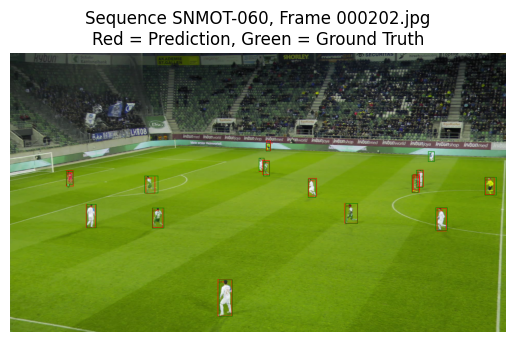

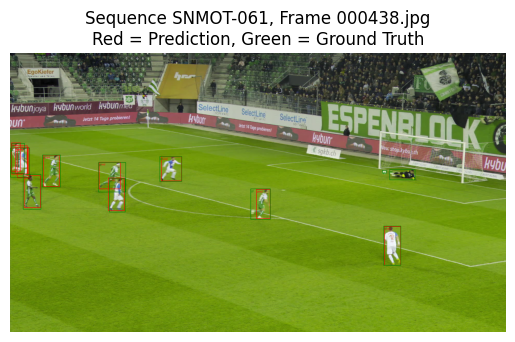

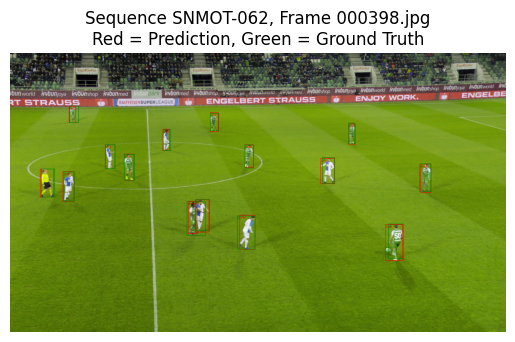

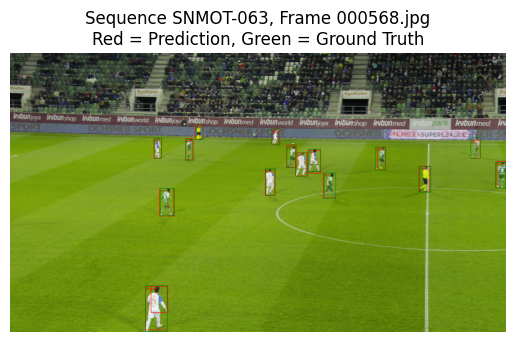

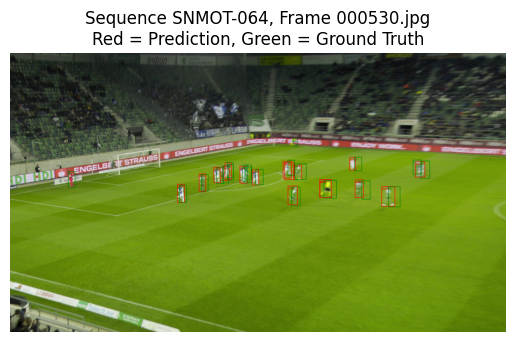

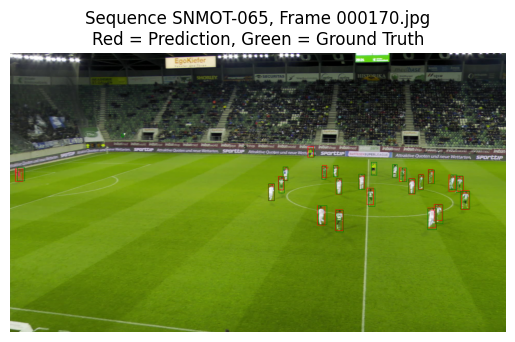

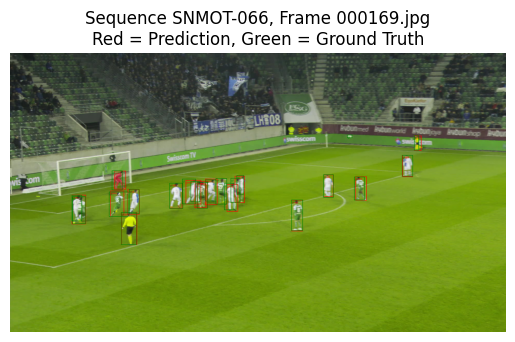

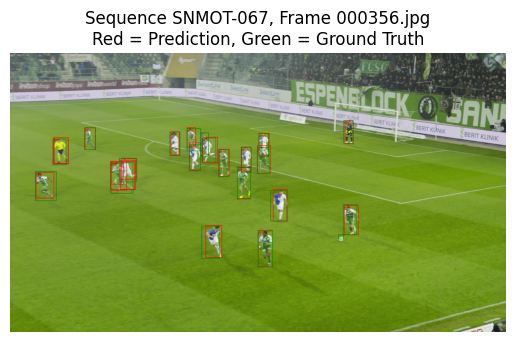

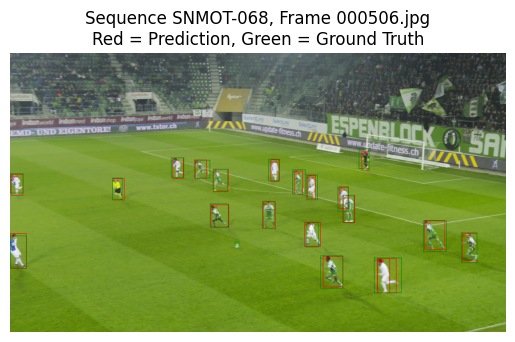

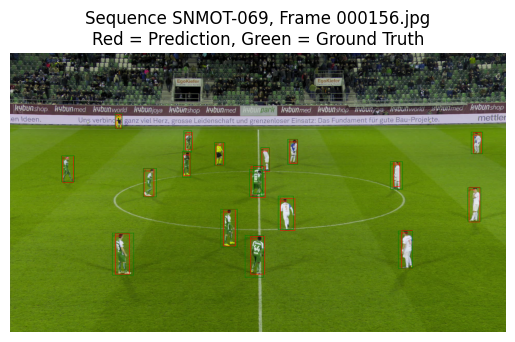

In [4]:


# --- LOAD MODEL ---
model = YOLO("discovery-runs/detect/ft-25epoch/weights/best.pt").to(DEVICE)


transform = T.ToTensor()

def load_gt_boxes(gt_path):
    gt_dict = defaultdict(list)
    if not os.path.exists(gt_path):
        return gt_dict
    with open(gt_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            frame, _, x, y, w, h, cls, _, _ = map(int, parts[:9])
            gt_dict[frame].append(torch.tensor([x, y, x + w, y + h], device=DEVICE))
    return gt_dict

def compute_iou(box1, box2):
    if box1.size(0) == 0 or box2.size(0) == 0:
        return torch.zeros((box1.size(0), box2.size(0)), device=box1.device)
    area1 = (box1[:, 2] - box1[:, 0]) * (box1[:, 3] - box1[:, 1])
    area2 = (box2[:, 2] - box2[:, 0]) * (box2[:, 3] - box2[:, 1])
    lt = torch.max(box1[:, None, :2], box2[:, :2])
    rb = torch.min(box1[:, None, 2:], box2[:, 2:])
    wh = (rb - lt).clamp(min=0)
    inter = wh[:, :, 0] * wh[:, :, 1]
    union = area1[:, None] + area2 - inter
    iou = inter / union
    return iou

def plot_gt_and_detections(image_tensor, detections, gt_boxes):
    from torchvision.utils import draw_bounding_boxes
    all_boxes = []
    labels = []
    colors = []

    for box in detections:
        all_boxes.append(box)
        labels.append("pred")
        colors.append("red")

    for box in gt_boxes:
        all_boxes.append(box)
        labels.append("gt")
        colors.append("green")

    if not all_boxes:
        return T.ToPILImage()(image_tensor)
    
    boxes_tensor = torch.stack(all_boxes).cpu()

    
    x1 = torch.min(boxes_tensor[:, 0], boxes_tensor[:, 2])
    y1 = torch.min(boxes_tensor[:, 1], boxes_tensor[:, 3])
    x2 = torch.max(boxes_tensor[:, 0], boxes_tensor[:, 2])
    y2 = torch.max(boxes_tensor[:, 1], boxes_tensor[:, 3])
    boxes_tensor = torch.stack([x1, y1, x2, y2], dim=1).to(torch.int)
    img_uint8 = (image_tensor * 255).byte().cpu()
    drawn = draw_bounding_boxes(img_uint8, boxes_tensor, labels=labels, colors=colors, width=2)
    return T.ToPILImage()(drawn)

# --- EXECUTION ---
results = []
sample_frames = []
total_tp = total_fp = total_fn = 0

seq_dirs = []
for split in ["train", "test"]:
    split_dir = os.path.join(BASE_DATA_ROOT, split)
    if not os.path.exists(split_dir):
        continue
    for d in sorted(os.listdir(split_dir)):
        full_path = os.path.join(split_dir, d)
        if os.path.isdir(full_path):
            seq_dirs.append((split, d))

print("Using device:", DEVICE)
print("Processing sequences...")

for split, seq_id in tqdm(seq_dirs, desc="Sequences", dynamic_ncols=True):
    seq_path = os.path.join(BASE_DATA_ROOT, split, seq_id)
    img_dir = os.path.join(seq_path, IMAGE_FOLDER)
    gt_path = os.path.join(seq_path, "gt", GT_FILENAME)
    gt_dict = load_gt_boxes(gt_path)

    if not os.path.exists(img_dir):
        continue

    all_img_paths = sorted([
        os.path.join(img_dir, file)
        for file in os.listdir(img_dir)
        if any(file.lower().endswith(ext) for ext in IMAGE_EXTS)
    ])

    random.shuffle(all_img_paths)
    all_img_paths = all_img_paths[:SAMPLE_PER_SEQ]

    for path in all_img_paths:
        try:
            img = Image.open(path).convert("RGB")
        except:
            continue

        img_tensor = transform(img).unsqueeze(0)
        img_tensor = img_tensor.half()
        img_tensor = img_tensor.squeeze(0) 

        img_tensor = img_tensor.to(DEVICE)



        filename = os.path.basename(path)
        try:
            frame_id = int(filename.split('.')[0])
        except:
            continue

        gt_boxes = gt_dict.get(frame_id, [])

        with torch.no_grad():
            yolo_result = model(img)[0]  # Get first result
            preds = yolo_result.boxes.data.to(DEVICE) if yolo_result.boxes is not None else torch.empty((0, 6)).to(DEVICE)

        pred_boxes = preds[:, :4][preds[:, 4] > SCORE_THRESH] if len(preds) else torch.empty((0, 4), device=DEVICE)

        # Accuracy
        if gt_boxes:
            gt_tensor = torch.stack(gt_boxes).to(DEVICE)
            if len(pred_boxes) > 0:
                ious = compute_iou(pred_boxes, gt_tensor)
                max_ious = ious.max(dim=1)[0]
                acc = (max_ious > IOU_THRESH).float().mean().item()
            else:
                acc = 0.0
        else:
            acc = 1.0 if len(pred_boxes) == 0 else 0.0

        results.append(acc)

        # Precision/Recall
        matched_gt = set()
        tp = fp = 0
        if len(pred_boxes) > 0 and len(gt_boxes) > 0:
            ious = compute_iou(pred_boxes, gt_tensor)
            for i in range(len(pred_boxes)):
                max_iou, gt_idx = ious[i].max(0)
                if max_iou > IOU_THRESH and gt_idx.item() not in matched_gt:
                    tp += 1
                    matched_gt.add(gt_idx.item())
                else:
                    fp += 1
        else:
            tp = 0
            fp = len(pred_boxes)

        fn = len(gt_boxes) - len(matched_gt)
        total_tp += tp
        total_fp += fp
        total_fn += fn

        if len(sample_frames) < NUM_VISUALS and seq_id not in [s[0] for s in sample_frames]:
            img_vis = plot_gt_and_detections(img_tensor, pred_boxes, gt_boxes)
            sample_frames.append((seq_id, filename, img_vis))
            

# --- METRICS ---
precision = total_tp / (total_tp + total_fp + 1e-6)
recall = total_tp / (total_tp + total_fn + 1e-6)
avg_acc = sum(results) / len(results) if results else 0
print(f"\nAverage Detection Accuracy over {len(results)} frames: {avg_acc * 100:.2f}%")
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}")

# --- SHOW EXAMPLES ---
for seq_id, filename, img in sample_frames:
    plt.imshow(img)
    plt.title(f"Sequence {seq_id}, Frame {filename}\nRed = Prediction, Green = Ground Truth")
    plt.axis("off")
    plt.show()
